# Extract the MS2 scan and do signature neutral loss search
- run multiple files
- need to define a precursor target list & scan range (let's just try to do more inclusive one)

In [63]:
# !pip install pymzml
%matplotlib inline

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import pymzml
import os
import pandas as pd
import sys

In [65]:
sys.path.append('../pyutils/')  # add the second parent directory
from searchMS2 import *

In [66]:
# spectrum.selected_precursors
# [{'mz': 417.320373535156, 'charge': 1, 'precursor id': '2'}]

In [67]:
exp_label = 'CD8TD_sample_AX' # 
output_fdr = 'output_CD8TD_AX_in-silico' # 
dir_path = "../../../../MS_MS_raw_mzML/AX_RPneg_TDcells/mzML/" # 
annot_dict_input = "./data/input/chainable_annotations.json" # 
files_and_dirs = os.listdir(dir_path)

mz_ppm = 100 # select precursor ppm range
rt_delta = 30 # select retention time delta -30, 30?

# Get the full path for each file/directory in the list
infiles = [os.path.join(dir_path, file) for file in files_and_dirs]

In [68]:
try:
    os.mkdir(f"./data/{output_fdr}")
except:
    None

In [69]:
exps = []
for infile in infiles:
    exps.append(pymzml.run.Reader(infile))

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


## Basic information - using the first instance

In [70]:
exp = pymzml.run.Reader(infiles[0])

[Warning] Not index found and build_index_from_scratch is False


In [71]:
# How many spectra
exp.get_spectrum_count()

4008

In [72]:
exp.ms_precisions # ms-level 1: ppm 5; ms-level 2: ppm 20?

{None: 0.0001, 0: 0.0001, 1: 5e-06, 2: 2e-05, 3: 2e-05}

### Small benchmarking if needed

In [73]:
collect_spec = []
ii = 0 
for spec in exp:
    if spec.ms_level == 2: 
        if (2000 < ii < 3500) & (836 < spec.selected_precursors[0]['mz'] < 837):
            print(ii)
            collect_spec.append(spec)
        ii += 1

plot_spectra(collect_spec)

[Warning] Not index found and build_index_from_scratch is False


In [74]:
search_NL(collect_spec,
              NL_mz = 87.03124,
              ppm = 100)

[]

##### summary
- a probably 12 min run (720 secs) for 4008 scans
- 0.17964 second/scan

## Load target list

In [75]:
import json

In [76]:
with open(annot_dict_input) as f: # 
    annot_dict = json.load(f)

In [77]:
FTIDs = list(annot_dict.keys())

In [78]:
df_feat_annot = pd.read_csv("../../../../asari-output-RPneg/output_asari_project_31312361/Feature_annotation.tsv",
                           sep = '\t', index_col=0)

In [79]:
df_feat_annot.head()

,mz,rtime,apex(scan number),[EmpCpd]interim_id,[EmpCpd]ion_relation,neutral_formula,neutral_formula_mass,name_1st_guess,matched_DB_shorts,matched_DB_records
[peak]id_number,,,,,,,,,,
F22,505.150330,140.614329,626,kp1_506.1566,"M0,M-H-",None,506.156634,"8-(2-{[(2E)-3-(3,4-dihydroxyphenyl)prop-2-enoy...","(HMDB0128938$8-(2-{[(2E)-3-(3,4-dihydroxypheny...","('C28H26O9_506.157682', '', 1)"
F144,506.151741,140.614329,626,kp1_506.1566,"13C/12C,M-H-",None,506.156634,"8-(2-{[(2E)-3-(3,4-dihydroxyphenyl)prop-2-enoy...","(HMDB0128938$8-(2-{[(2E)-3-(3,4-dihydroxypheny...","('C28H26O9_506.157682', '', 1)"
F190,401.305092,149.563090,666,kp2_401.3091,"13C/12C,M-H-",None,401.309070,NaN,NaN,NaN
F24,400.301849,149.563090,666,kp2_401.3091,"M0,M-H-",None,401.309070,NaN,NaN,NaN
F193,401.309975,189.834108,850,kp3_401.3133,"13C/12C,M-H-",None,401.313346,3-hydroxypentadecanoyl carnitine,(HMDB0061641$3-hydroxypentadecanoyl carnitine),"('C22H43NO5_401.314123', '', 1)"


In [80]:
## missing the rtime range parameters
df_feat = pd.read_csv("../../../../asari-output-RPneg/output_asari_project_31312361/export/full_Feature_table.tsv",
                      sep = '\t', index_col=0)

In [81]:
df_feat.columns

Index(['mz', 'rtime', 'rtime_left_base', 'rtime_right_base',
       'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting',
       'snr', 'detection_counts', 'MT_20230308_032', 'Blank_20230308_002',
       'Blank_20230308_004', 'Blank_20230308_006', 'Blank_std_20230308_1_002',
       'MT_20230308_002', 'MT_20230308_004', 'MT_20230308_006',
       'MT_20230308_008', 'MT_20230308_010', 'MT_20230308_012',
       'MT_20230308_014', 'MT_20230308_016', 'MT_20230308_018',
       'MT_20230308_020', 'MT_20230308_022', 'MT_20230308_024',
       'MT_20230308_026', 'MT_20230308_028', 'MT_20230308_030'],
      dtype='object')

In [82]:
# Select the desired rows and columns from the DataFrame
subset = df_feat_annot.loc[FTIDs, ['mz', 'rtime', 'apex(scan number)']]
# drop duplicates
subset_dd = subset.drop_duplicates() 
# Convert the subset to a dictionary with row-wise orientation
target_dict = subset_dd.to_dict(orient='index')

In [83]:
if 'rtime_left_base' not in list(annot_dict.values())[0]:
    for ftID, v in annot_dict.items():
        row = df_feat.loc[ftID] # get the row
        annot_dict[ftID]['mz'] = row['mz']
        annot_dict[ftID]['rtime'] = row['rtime']
        annot_dict[ftID]['rtime_left_base'] = row['rtime_left_base']
        annot_dict[ftID]['rtime_right_base'] = row['rtime_right_base']
        annot_dict[ftID]['cSelectivity'] = row['cSelectivity']
        annot_dict[ftID]['goodness_fitting'] = row['goodness_fitting']
        annot_dict[ftID]['snr'] = row['snr']

In [84]:
list(annot_dict.items())[0]

('F4086',
 {'name': 'PS 11:6',
  'neutral_mass': 429.08248284315,
  'formula': 'C17H20NO10P',
  'formula_dict': {'C': 17, 'H': 20, 'O': 10, 'N': 1, 'P': 1},
  'isomers': [],
  '[M-H+e]': 428.07520639082907,
  'annotation_evidence': {'in-silico': '1'},
  'mz': 428.0752,
  'rtime': 20.78,
  'rtime_left_base': 19.92,
  'rtime_right_base': 23.29,
  'cSelectivity': 1.0,
  'goodness_fitting': 0.92,
  'snr': 332.0})

## Do a pre-filtering, mostly those that fall outside rtime 200-400 seconds, probably won't be PS

In [85]:
target_dict_upd = {}
for k,v in target_dict.items():
    if 100<v['rtime']<500:
        target_dict_upd.update({k:v})

In [86]:
len(target_dict)

1144

In [87]:
len(target_dict_upd)

947

In [88]:
# testing
target_dict_test = {k:v for k,v in target_dict_upd.items() if k == "F13804"}
target_dict_test

{'F13804': {'mz': 836.5431061,
  'rtime': 308.9440999,
  'apex(scan number)': 1411}}

## get potential precursor from multiple files

In [89]:
def get_delta_mz(mz, ppm=20):
    '''
    get delta mz based on ppm
    '''
    delta_mz = round((mz * ppm * 1e-6),4)
    return(delta_mz)

# limit to a retention time window for the spectra

In [90]:
def subset_specs(exp,
                 rt_range):
    rt_scans = [round(spec.scan_time[0]*60,2) for spec in exp]
    ID_lower = next((i for i, x in enumerate(rt_scans) if x >= rt_range[0] ), None)
    ID_upper = next((i for i, x in enumerate(rt_scans) if x >= rt_range[1] ), None)
    sub_exp = []
    for spec in exp:
        if ID_lower < spec.ID < ID_upper:
            sub_exp.append(spec)
    return(sub_exp)

In [91]:
sub_exps = []
for exp in exps: 
    sub_exps.append(subset_specs(exp,rt_range = [200,500]))

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


In [92]:
res_dict = {}
ii = 0
for exp in sub_exps:
    for k,v in target_dict_upd.items(): # target_dict_test target_dict_upd
        delta_mz = get_delta_mz(v['mz'],mz_ppm)
        spectra = get_potential_precursor_from_exp_filtbyRt(exp, 
                              min_rt_sec = v['rtime'] - rt_delta, 
                              max_rt_sec = v['rtime'] + rt_delta, 
                              min_mz = v['mz'] - delta_mz,
                              max_mz = v['mz'] + delta_mz, 
                              ms_level=2)
        res_dict[k] = spectra

In [93]:
res_dict_clean = {k:v for k,v in res_dict.items() if len(v) != 0}

In [94]:
parsed_res_dict_clean = {}
for k,v in res_dict_clean.items():
    parsed_res_dict_clean[k] = []
    for spec_obj in v:
        parsed_res_dict_clean[k].append(export_spectrum(spec_obj))

In [95]:
def search_NL_customSpecObj(spectra,
              NL_mz = 87.03124,
              ppm_prec = 100,
              ppm = 40):
    res_data = []

    for spec in spectra:
        in_ms2_precursor = find_in_ms2_precursor(spec,ppm_prec = 100, present = 0.05)
        if np.isnan(in_ms2_precursor):
            sel_prec_mz = spec['precursor_mz'] # this m/z will not be exactly the precursor m/z    
        else:
            sel_prec_mz = in_ms2_precursor
        
        sel_mz = [mz for mz in spec['mzs'] if abs(mz - sel_prec_mz) < (np.ceil(NL_mz)+1)] # +1 is to increase a little bit the range
    
        for mz in sel_mz:
            calc_ppm = cal_ppm((sel_prec_mz - mz),NL_mz)
            if calc_ppm < ppm:
                print(calc_ppm)
                res_data.append(spec)
                break
    return res_data

In [96]:
parsed_NL_res_dict = {}
for FTID, spectra in parsed_res_dict_clean.items():
    parsed_NL_res_dict.update({FTID: search_NL_customSpecObj(spectra)})

3.6418316573222747
22.83034373631906
2.976212191251344
23.979356435378595
3.665619810425808
28.575407232923002
3.6418316573222747
22.83034373631906
2.976212191251344
23.979356435378595
3.665619810425808
28.575407232923002
3.6418316573222747
22.83034373631906
2.976212191251344
23.979356435378595
3.665619810425808
28.575407232923002


In [97]:
parsed_NL_res_dict_clean = {k:v for k,v in parsed_NL_res_dict.items() if len(v) != 0}

In [98]:
with open(f"./data/{output_fdr}/NL_matched_specs.json", "w") as f:
    json.dump(parsed_NL_res_dict_clean, f, indent=2)

## Document annotation in the annotation dict

In [99]:
for k,v in parsed_NL_res_dict_clean.items():
    if "MS2" not in annot_dict[k]['annotation_evidence']:
        annot_dict[k]['annotation_evidence']["MS2"] = []
        
    in_ms2_precursors = [find_in_ms2_precursor(x) for x in v]
    record = {
        'source':exp_label,
        'estimated_time': [x['est_time'] for x in v],
        'precursor': [x['precursor_mz'] for x in v],
        'in-ms2-precursor': in_ms2_precursors,
        'ppm_btw_precur_feat_mz': round(cal_ppm(np.mean([x['precursor_mz'] for x in v]),annot_dict[k]['mz']),2),
        'ppm_btw_in-ms2_precur_feat_mz': round(cal_ppm(np.nanmean(in_ms2_precursors,),annot_dict[k]['mz']),2),
        'parameters':{
            'neutral_loss': 87.03124,
            'ppm_NL':40,
            'rt_window':[-rt_delta,rt_delta],
            'mz_ppm':mz_ppm            }
        }
    if not np.isnan(record['ppm_btw_in-ms2_precur_feat_mz']):
        if record['ppm_btw_in-ms2_precur_feat_mz'] > 20: 
            record = {}
            print(f"exlude {k}/{annot_dict[k]['name']} because out of ppm range to in-ms2 precursor m/z")
    else:
        if record['ppm_btw_precur_feat_mz'] > 20:
            record = {}
            print(f"exlude {k}/{annot_dict[k]['name']} because out of ppm range comparing to precursor m/z")
        
    if record not in annot_dict[k]['annotation_evidence']['MS2']:
        annot_dict[k]['annotation_evidence']['MS2'].append(record)

exlude F13473/LPS 41:6 because out of ppm range to in-ms2 precursor m/z


In [100]:
with open(f"./data/{output_fdr}/chainable_annotation_{exp_label}.json", "w") as f:
    json.dump(annot_dict, f, indent=2)

# plot accordingly

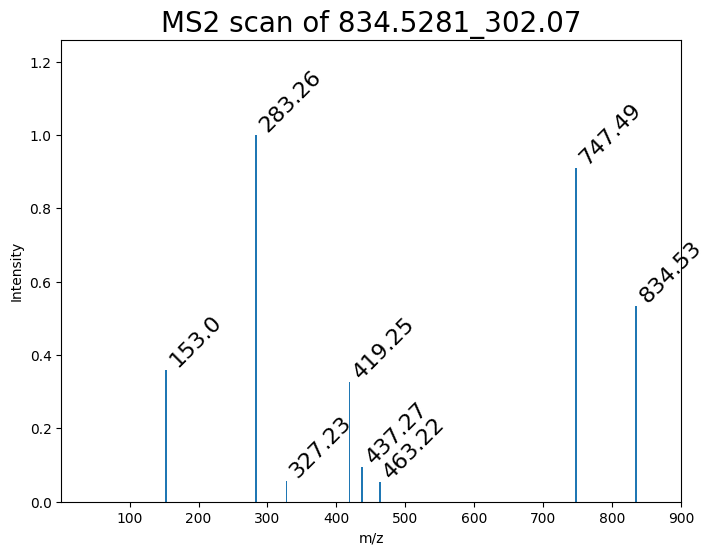

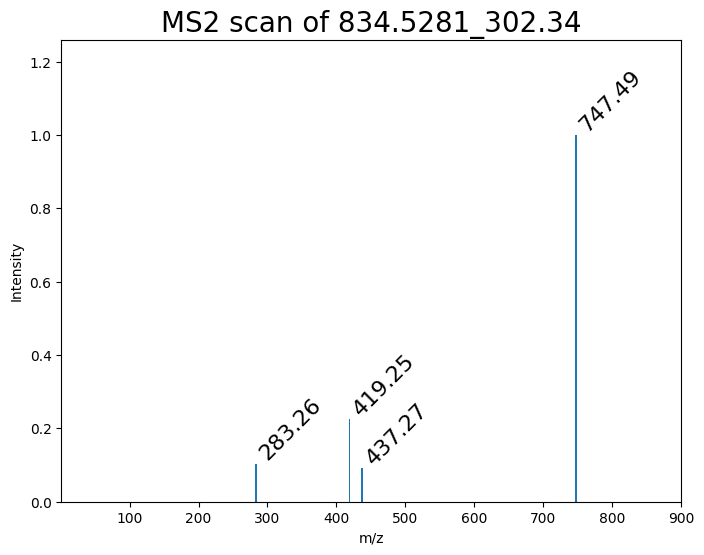

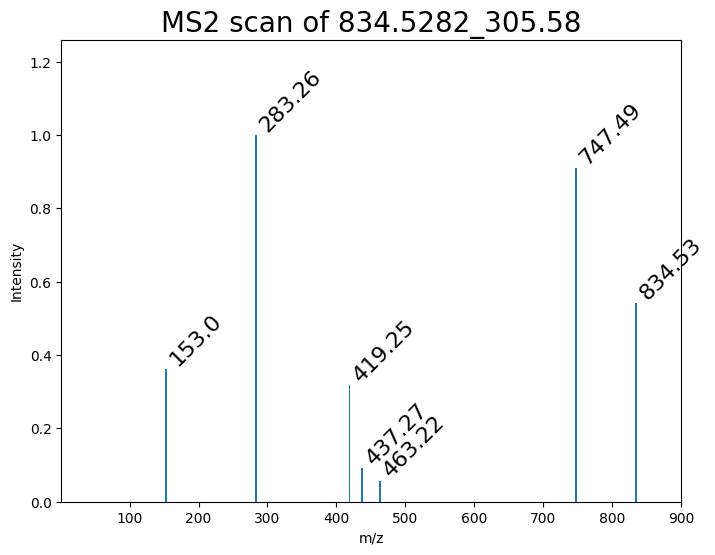

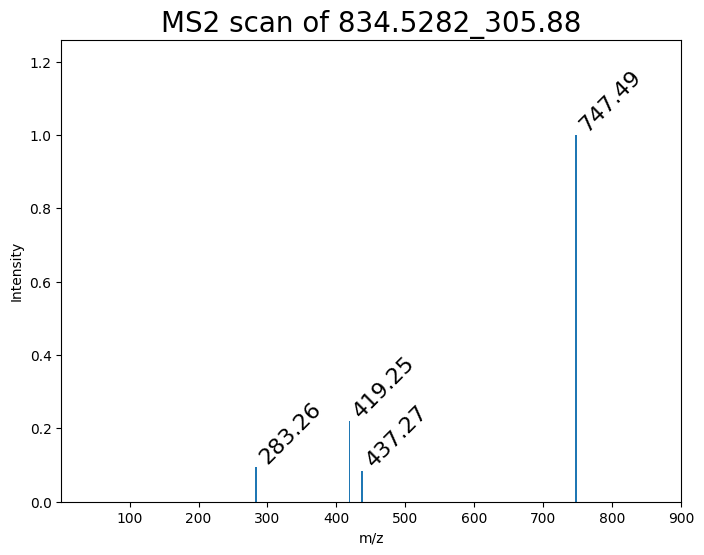

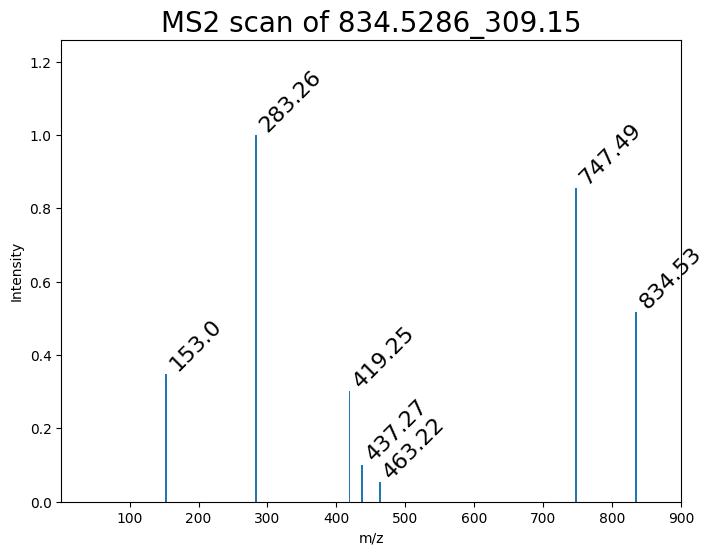

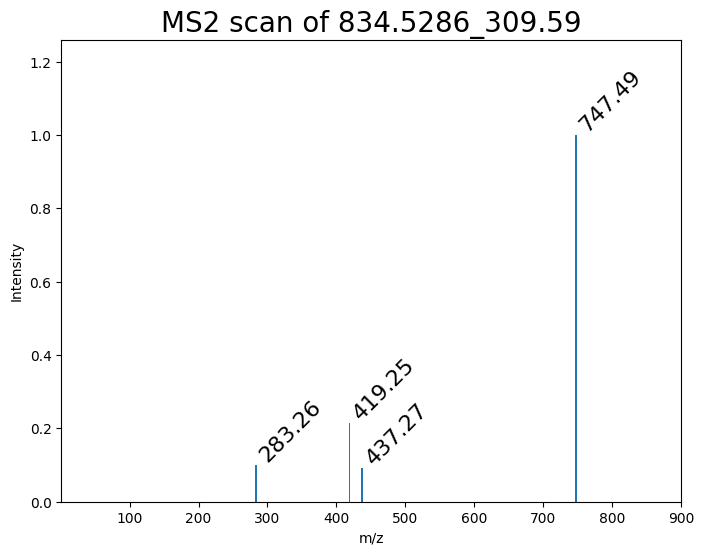

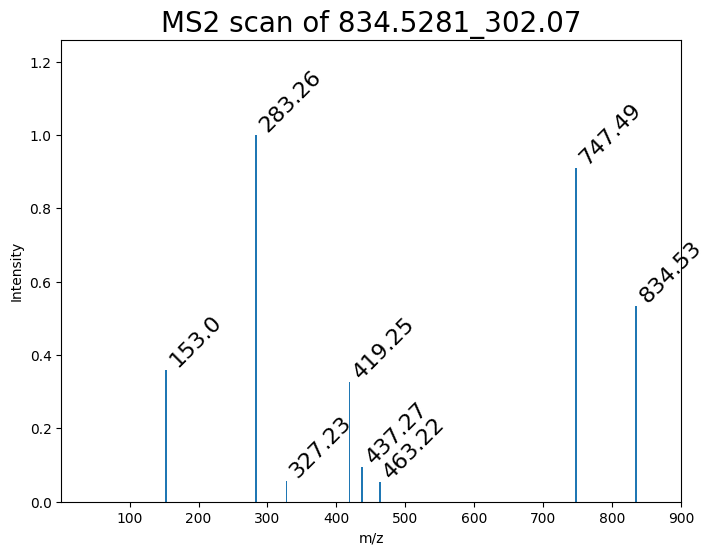

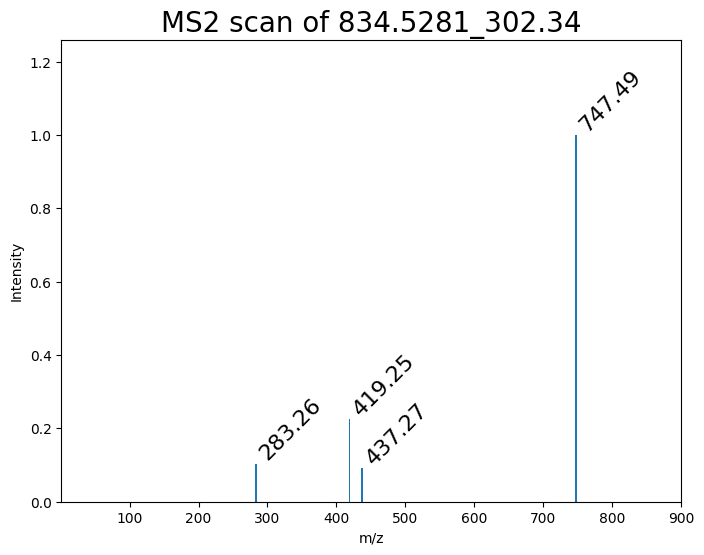

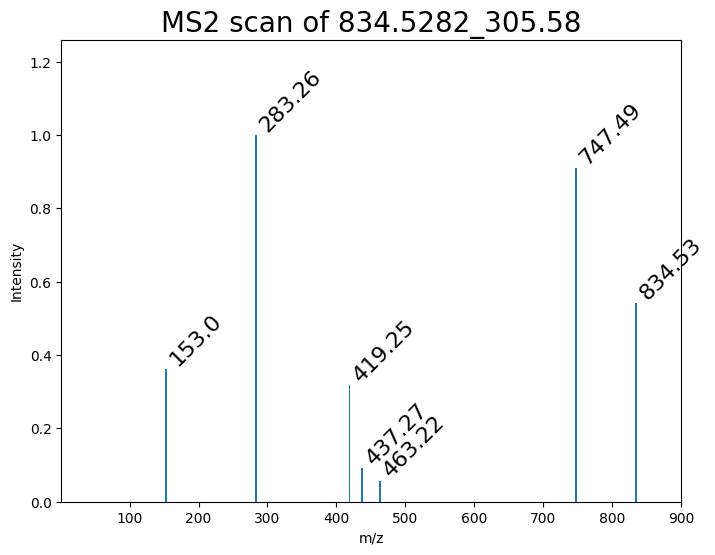

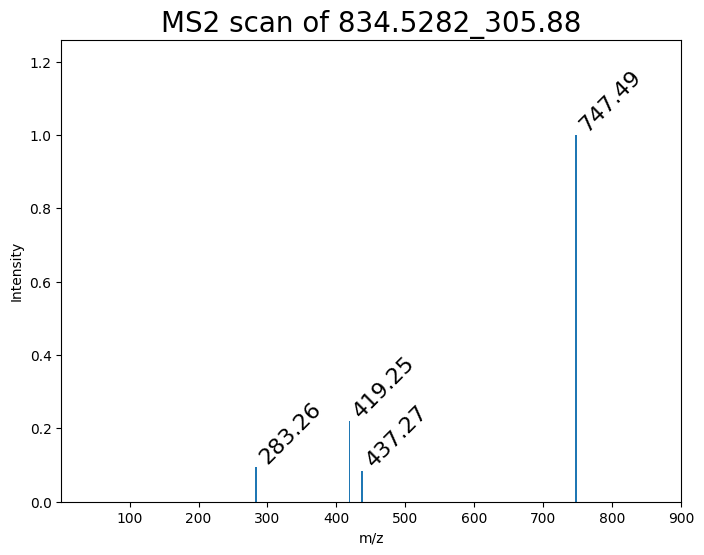

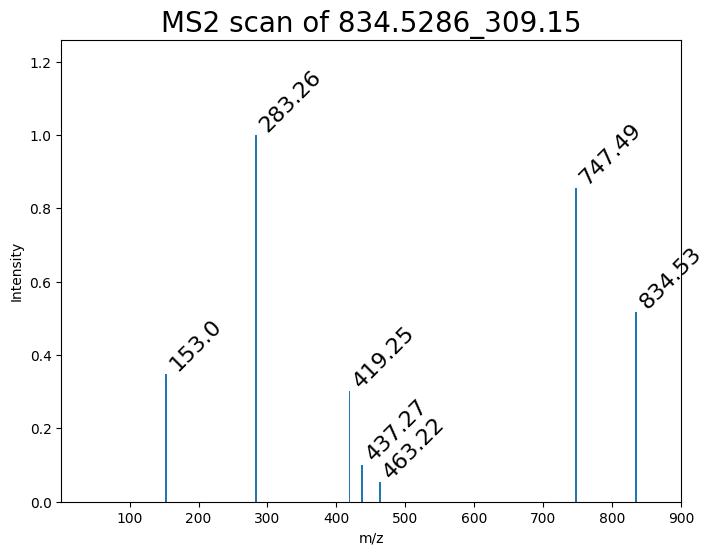

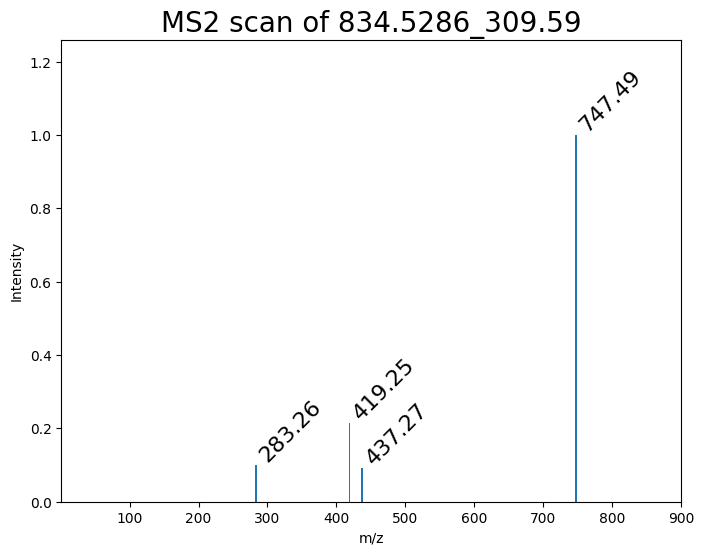

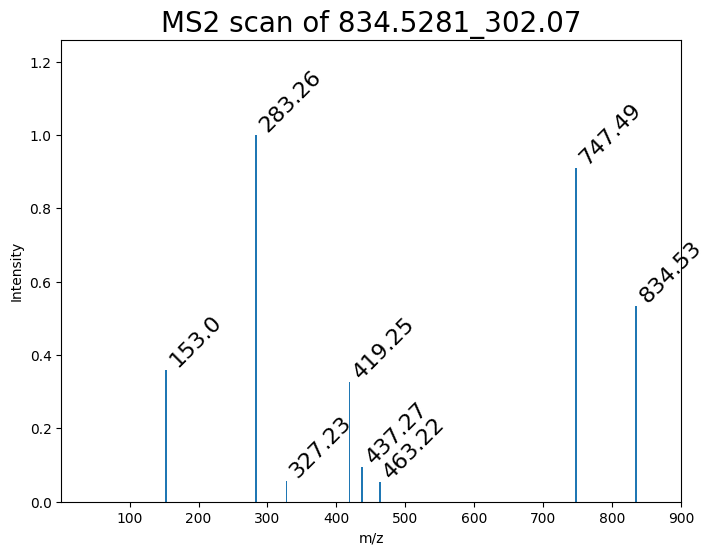

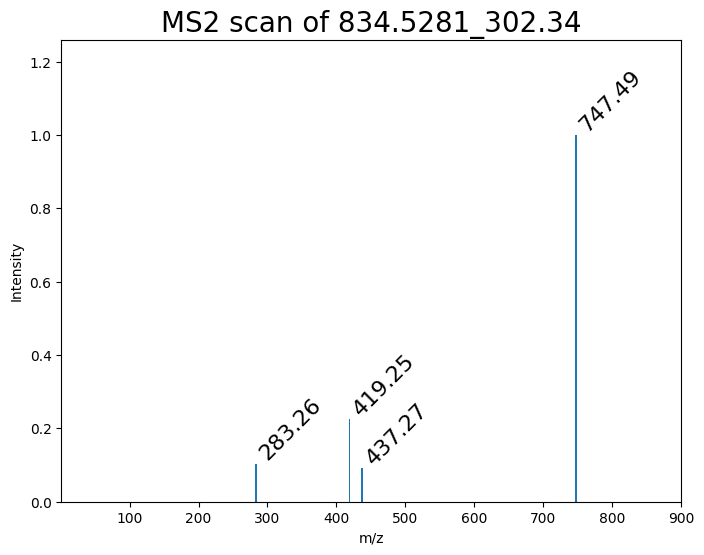

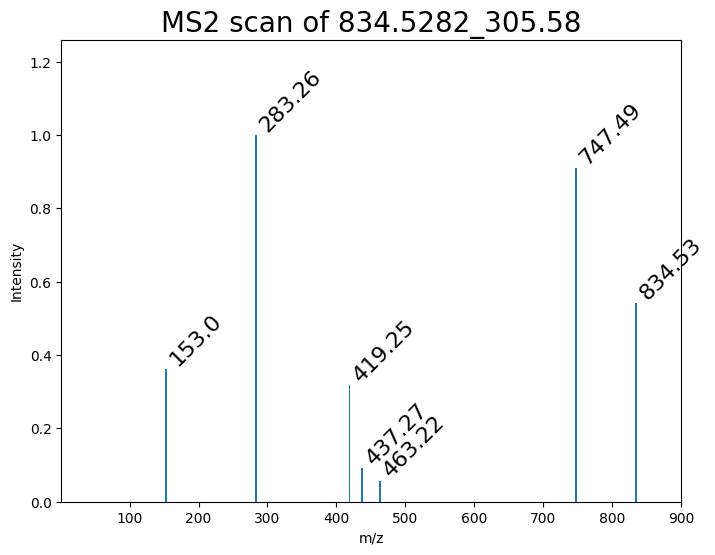

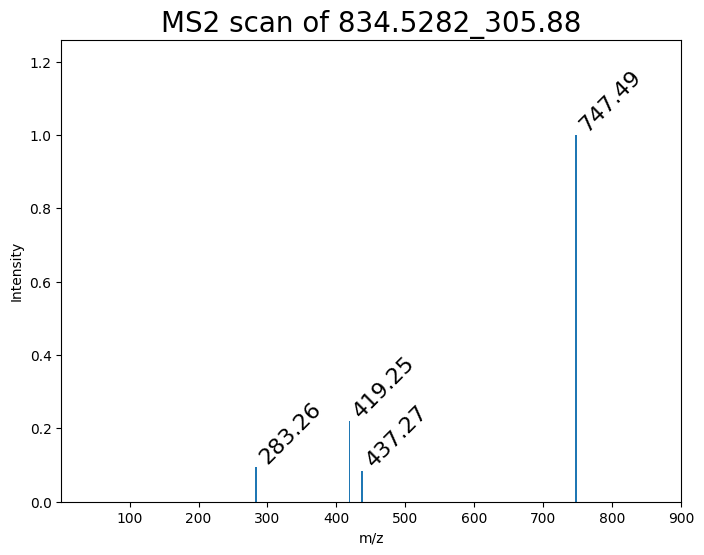

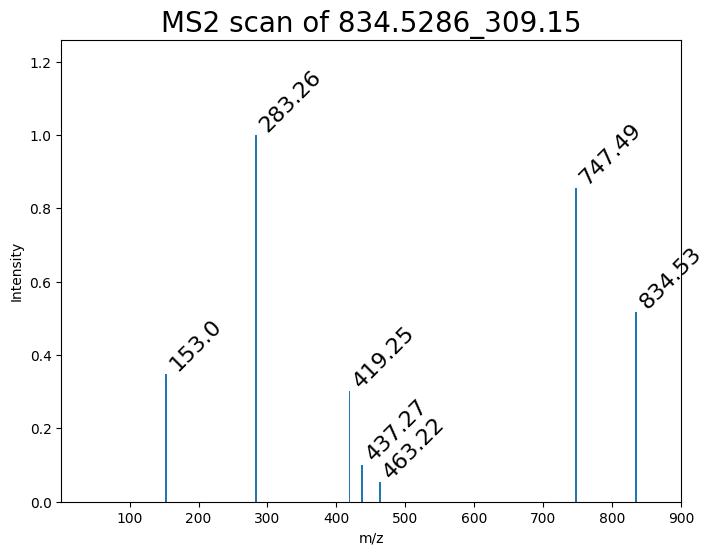

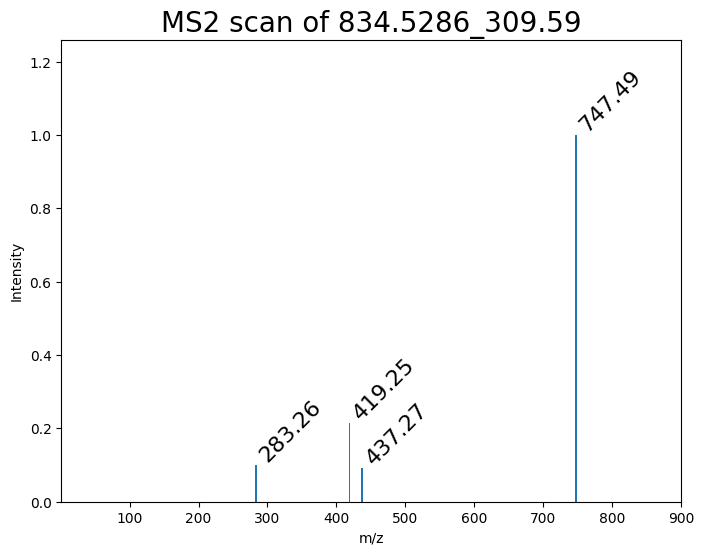

In [101]:
for FTID in parsed_NL_res_dict_clean.keys():
    plot_spectrum_from_list_of_dict(spec_dicts = parsed_NL_res_dict_clean[FTID], 
                 save_figure=True,
                 output_path=f"./data/{output_fdr}/{FTID}_{annot_dict[FTID]['name']}/",
                 label = f"{FTID}_{annot_dict[FTID]['name']}"
                 )